# Data Understanding Feature Engineering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [20]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   race_url                      589865 non-null  object        
 1   race_name                     589865 non-null  object        
 2   points                        589388 non-null  float64       
 3   uci_points                    251086 non-null  float64       
 4   length                        589865 non-null  float64       
 5   climb_total                   442820 non-null  float64       
 6   profile                       441671 non-null  float64       
 7   startlist_quality             589865 non-null  int64         
 8   date                          589865 non-null  datetime64[ns]
 9   position                      589859 non-null  float64       
 10  cyclist_url                   589865 non-null  object        
 11  cyclist_age  

In [22]:
'''
cyclist_bmi 
cyclist_age_group
cyclist_climb_power
cyclist_previous_experience
cyclist_days_since_last_race
race_physical_effort
race_prestige
'''

'\ncyclist_bmi \ncyclist_age_group\ncyclist_climb_power\ncyclist_previous_experience\ncyclist_days_since_last_race\nrace_physical_effort\nrace_prestige\n'

## Cyclist Understanding

### BMI Attribute

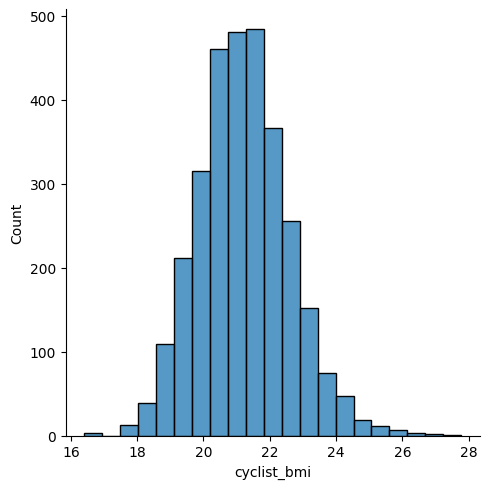

In [23]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

sb.displot(dataset.drop_duplicates(subset=['cyclist_bmi', 'cyclist_url']), 
                x="cyclist_bmi", 
                kind="hist",
                row_order="desc",
                bins=n_bins)

<Axes: xlabel='cyclist_bmi', ylabel='cyclist_age_group'>

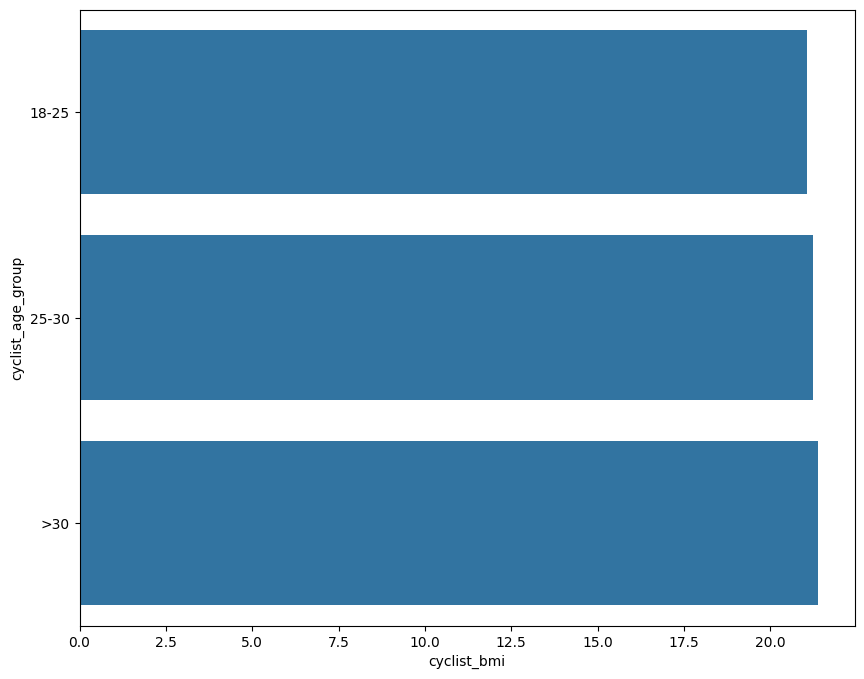

In [27]:
tmp_df = pd.DataFrame({
    'cyclist_age_group': dataset['cyclist_age_group'],
    'cyclist_bmi': dataset['cyclist_bmi'],
    'cyclist_url': dataset['cyclist_url'],
    'race_name': dataset['race_name'],
    'year': dataset['date'].dt.year,
}).drop_duplicates(subset=['cyclist_url', 'race_name', 'year']) # vogliamo considerare ogni ciclista una sola volta per ogni edizione di una gara

tmp_mean = tmp_df.groupby('cyclist_age_group')['cyclist_bmi'].mean().reset_index()

plt.figure(figsize=(10, 8))
sb.barplot(y='cyclist_age_group', x='cyclist_bmi', data=tmp_mean[tmp_mean['cyclist_bmi'].notnull()], orient='h')

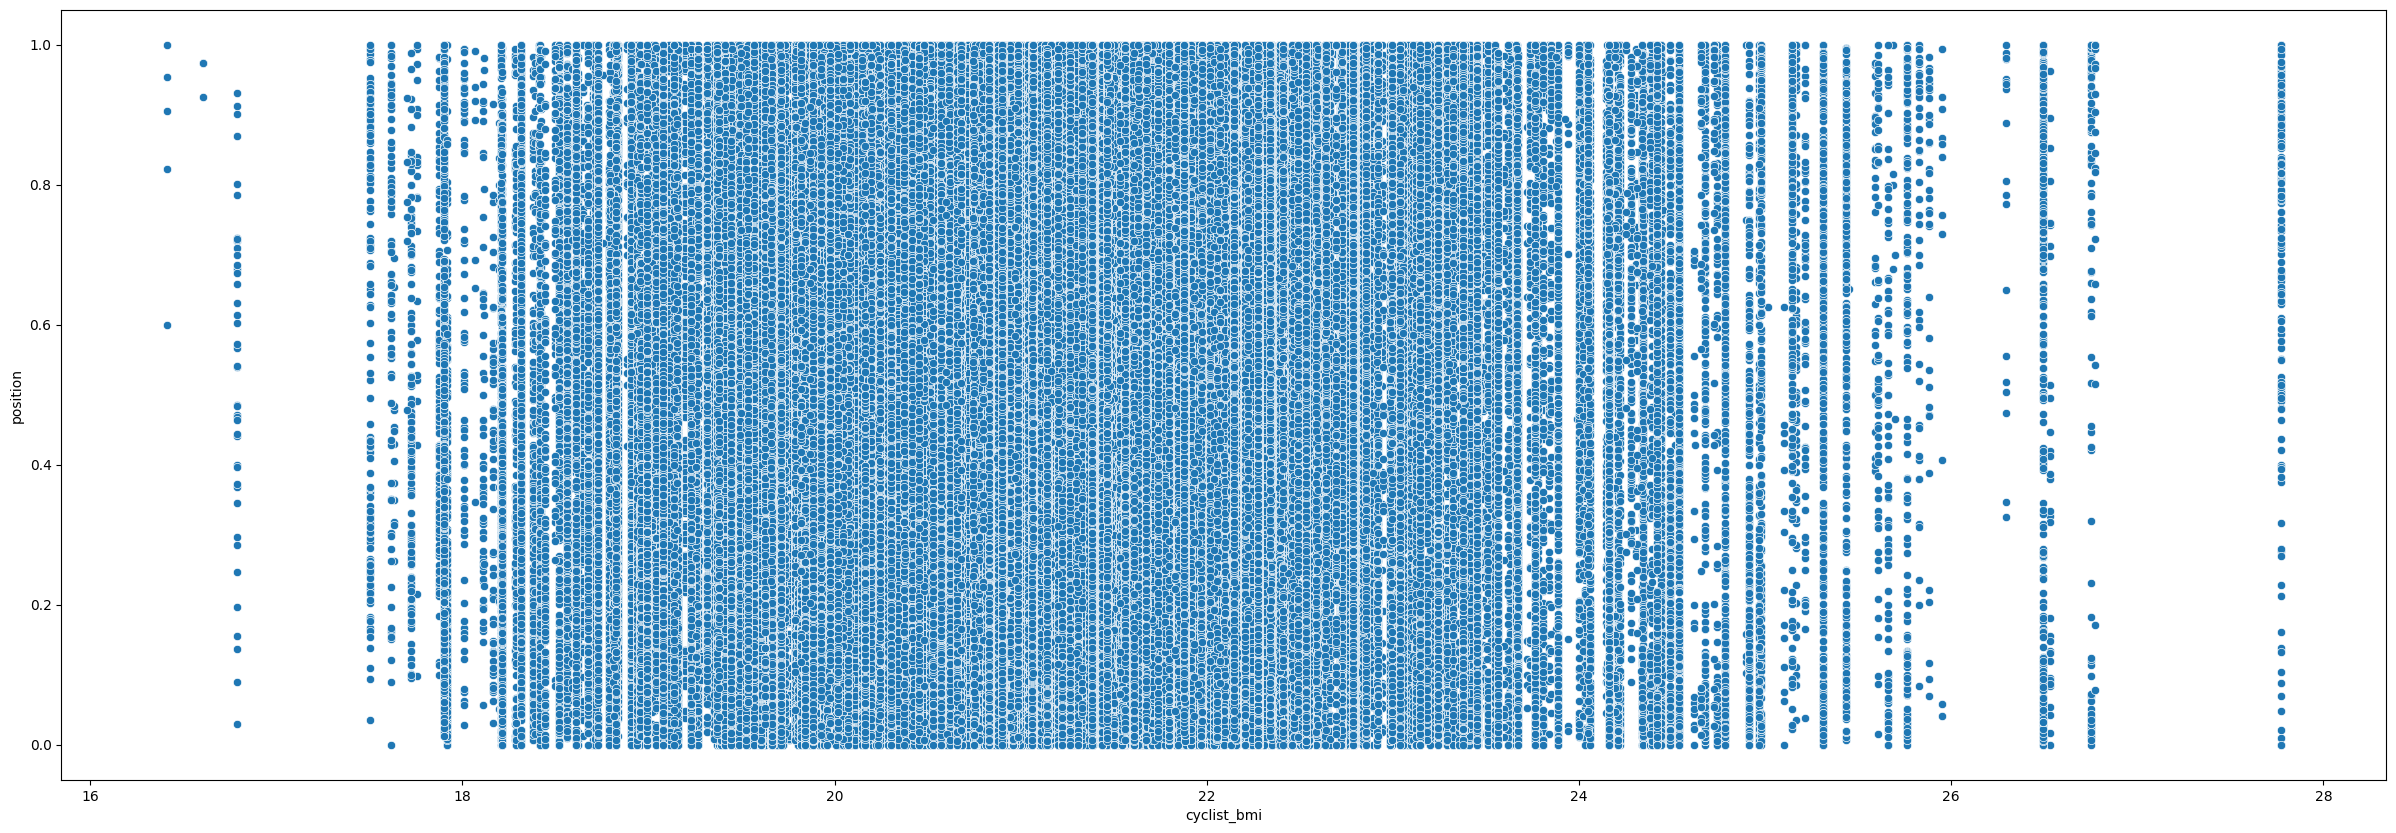

In [28]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_bmi', y='position', data=dataset)
plt.show()

nessuna correlazione evidente

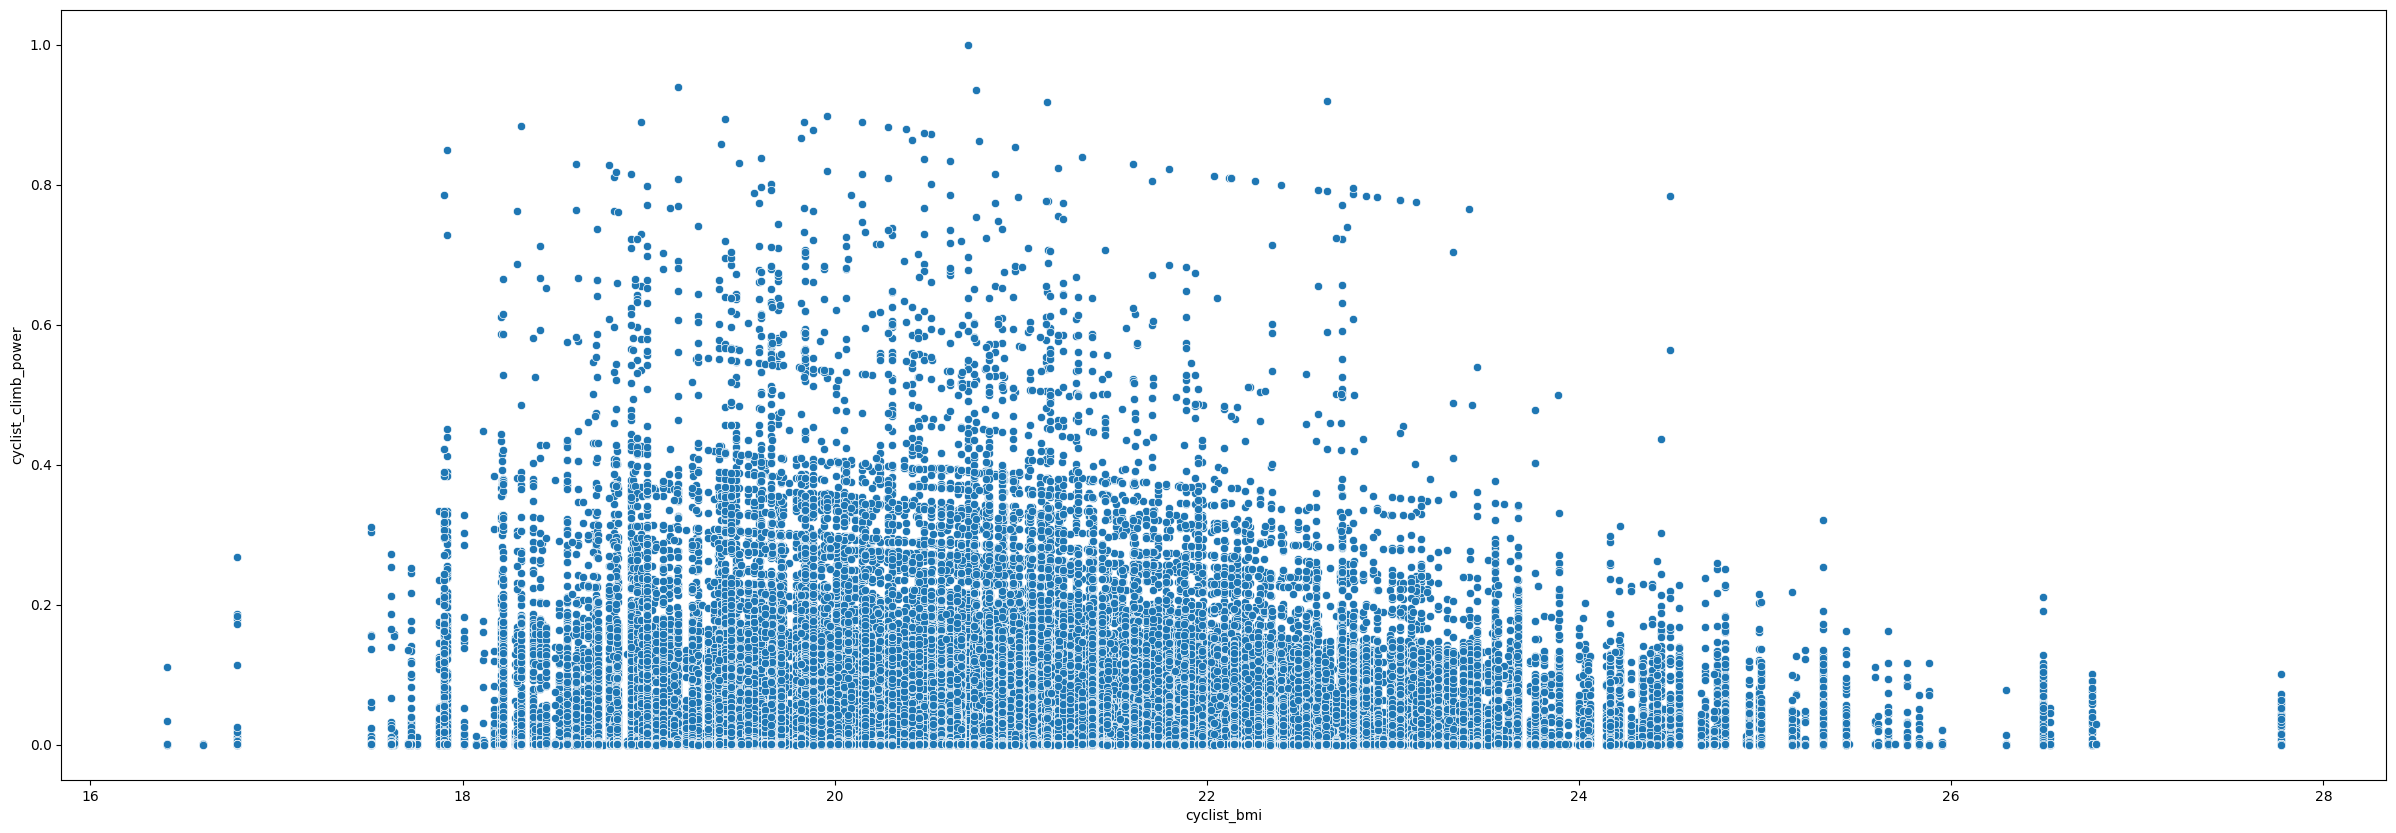

In [ ]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_bmi', y='cyclist_climb_power', data=dataset)
plt.show()

Nota forma a campana, bmi medio sembra consentire power maggiori

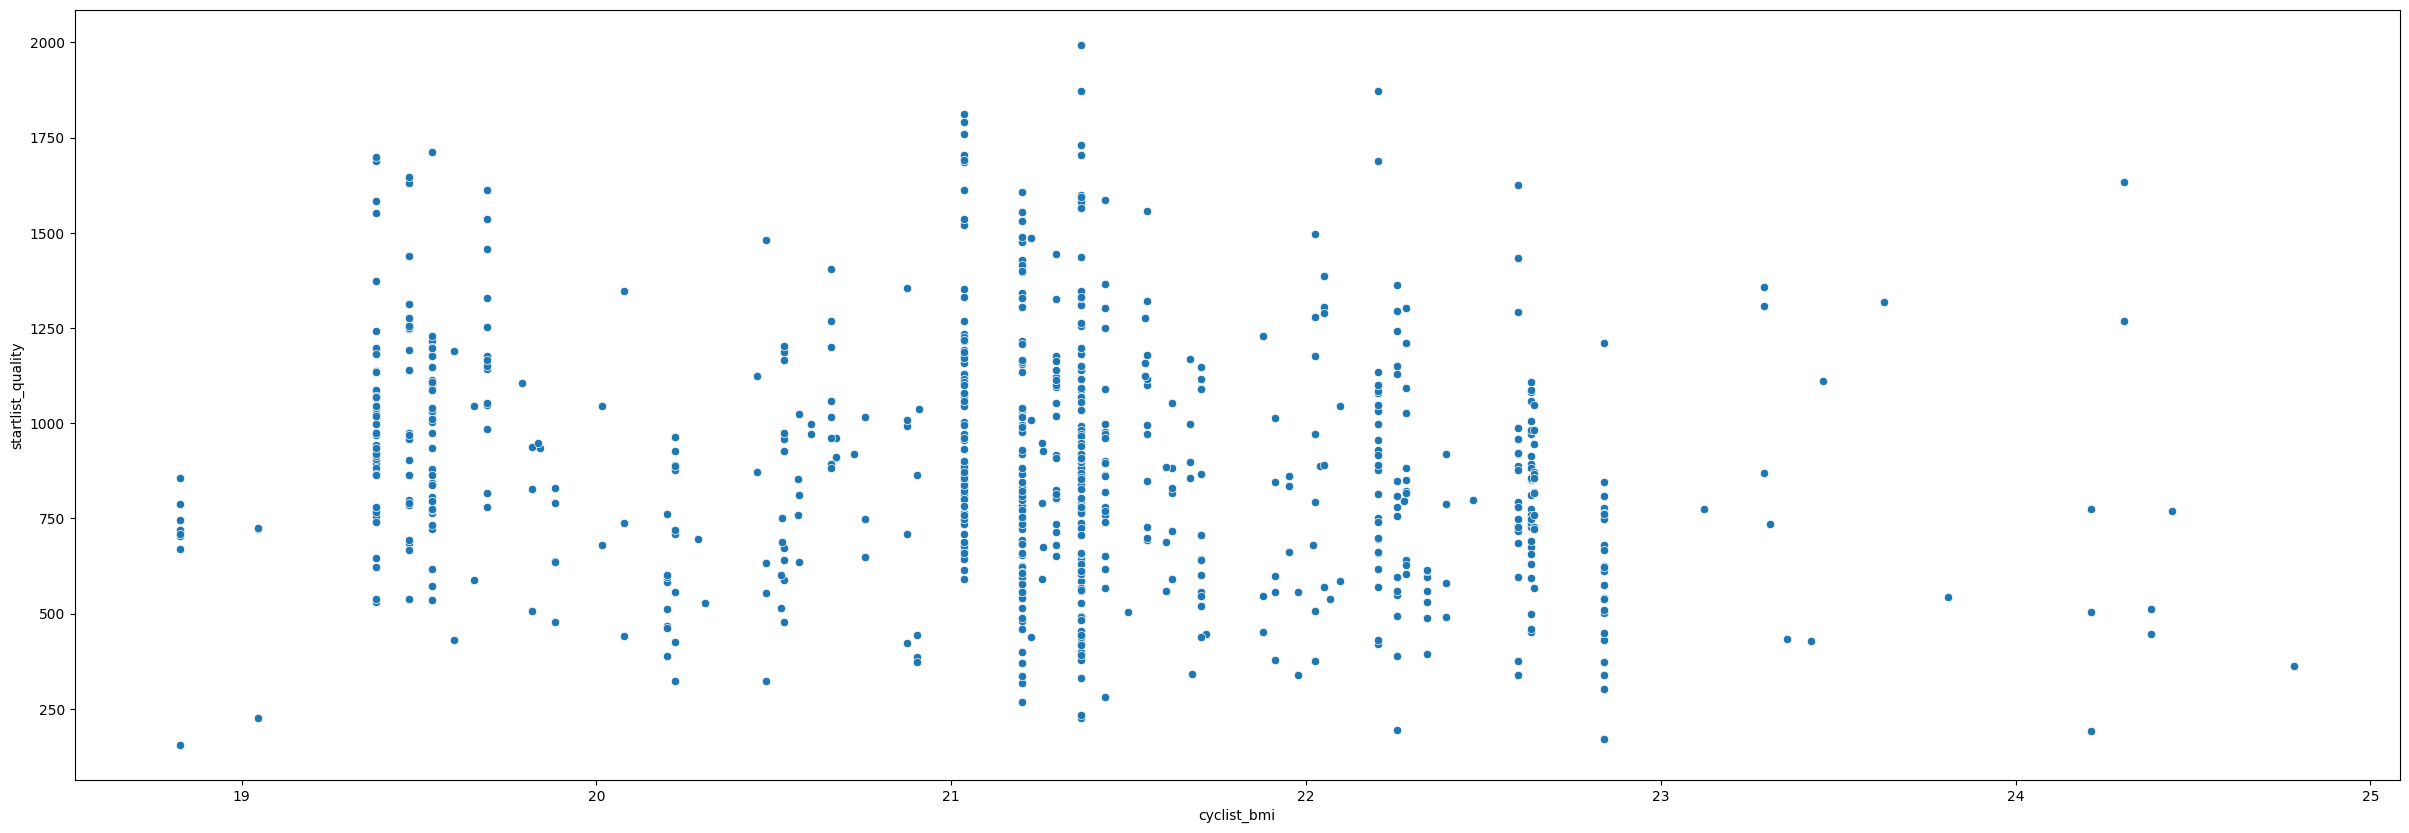

In [31]:
tmp_df = pd.DataFrame({
    'startlist_quality': dataset['startlist_quality'],
    'race_name': dataset['race_name'],
    'year': dataset['date'].dt.year,
    'cyclist_bmi': dataset['cyclist_bmi'],
}).drop_duplicates(subset=['race_name', 'year'])

plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_bmi', y='startlist_quality', data=tmp_df)
plt.show()

In [ ]:
dataset.info()
# birth year, heigth -> float to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

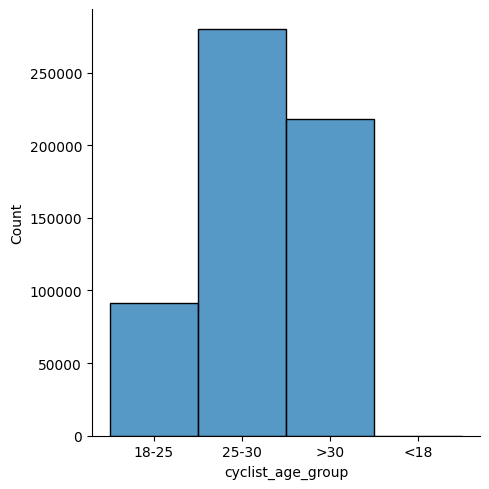

In [6]:
n_bins = dataset['cyclist_age_group'].nunique()

sb.displot(dataset, 
                x="cyclist_age_group", 
                kind="hist",
                row_order="desc",
                bins=n_bins) #TODO: fix labels' order

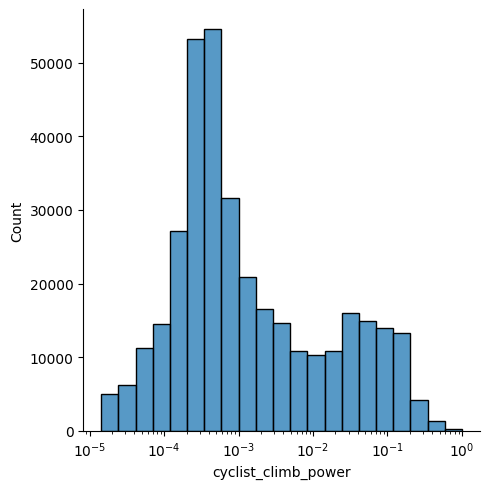

In [9]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

sb.displot(dataset.drop_duplicates(subset=['cyclist_climb_power', 'cyclist_url', 'date']), 
                x="cyclist_climb_power", 
                kind="hist",
                row_order="desc",
                bins=n_bins, 
                log_scale=True)